In [2]:
%matplotlib inline

import glob
from platform import python_version

import matplotlib
import numpy as np
import pandas as pd
import sklearn
#import torch
import matplotlib.pyplot as plt

print("python version==%s" % python_version())
print("pandas==%s" % pd.__version__)
print("numpy==%s" % np.__version__)
print("sklearn==%s" % sklearn.__version__)
#print("torch==%s" % torch.__version__)
print("matplotlib==%s" % matplotlib.__version__)

python version==3.10.9
pandas==1.5.3
numpy==1.23.5
sklearn==1.2.1
matplotlib==3.7.0


In [3]:
# Load Berkay data

def load_biolearn_data(filename, sheet_name, nr, ng):
    # Load data
    # nr = number of responses
    # ng = number of genes
    df_data = pd.read_excel(filename, header=0, sheet_name=sheet_name)
    df_classes = df_data.loc[0:nr-1,df_data.columns[0]]
    df_data = df_data.loc[0:nr-1,df_data.columns[1:ng+1]]
    df_data = df_data.dropna(axis=0, how='any')
    df_data = df_data.reset_index(drop=True)
    
    return df_data, df_classes

filename = r"./dummy_data.xlsx"

nr = 128
ng = 22
sheet_name="Fold Changes with averages"

df_data, df_classes = load_biolearn_data(filename, sheet_name, nr, ng)

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df_data)
    display(df_classes)

,Gene 1,Gene 2,Gene 3,Gene 4,Gene 5,Gene 6,Gene 7,Gene 8,Gene 9,Gene 10,Gene 11,Gene 12,Gene 13,Gene 14,Gene 15,Gene 16,Gene 17,Gene 18,Gene 19,Gene 20,Gene 21,Gene 22
0,0.06,0.12,-0.09,0.02,0.22,0.10,0.62,-0.06,0.44,0.08,0.72,-0.52,-0.43,0.49,-0.91,0.51,-0.09,-0.73,-0.55,-0.93,0.83,-0.42
1,0.96,-0.53,0.96,-0.01,0.67,-0.89,0.19,-0.33,-0.15,-0.11,-0.97,0.10,-0.32,-0.01,0.89,0.29,0.51,0.90,0.63,0.70,-0.27,-0.70
2,0.70,0.60,-1.00,0.79,0.97,0.77,-0.77,0.99,-0.38,0.09,-0.57,-0.61,0.69,-0.18,0.03,0.17,0.26,-0.22,0.04,0.11,0.25,-0.29
3,0.72,-0.15,0.64,-0.05,0.72,-0.63,0.68,-0.32,0.41,0.74,-0.61,0.90,-0.72,0.49,0.60,-0.31,0.86,-0.13,-1.00,0.23,-0.17,-0.11
4,-0.53,0.41,0.90,-0.01,-0.20,0.70,0.34,-0.18,0.43,0.19,0.43,0.81,-0.11,0.69,-0.44,-0.01,-0.11,0.58,-0.37,0.42,-0.97,-0.77
5,0.35,0.55,-0.71,0.62,-0.43,0.71,0.07,-0.79,0.80,-0.56,0.66,-0.24,-0.32,-0.49,0.30,0.06,1.00,-0.11,0.45,0.82,0.26,-0.57
6,-0.35,-0.39,-0.03,-0.86,-0.40,-0.05,-0.99,0.68,-0.14,-0.49,0.96,-0.35,0.67,0.55,-0.20,0.41,0.53,-0.23,0.29,0.90,-0.14,-0.62
7,0.58,-0.89,-0.04,0.67,0.39,0.95,-0.33,-0.03,0.93,0.49,-0.49,-0.63,0.08,0.97,0.56,0.58,0.97,0.18,-0.17,0.67,0.18,0.57
8,-0.63,0.94,0.65,-0.91,-0.94,-0.90,-0.54,-1.00,-0.24,-0.12,0.59,0.55,0.34,0.09,0.13,0.96,-0.32,-0.85,0.53,0.92,0.88,-0.07
9,-0.48,-0.99,0.83,-0.24,-0.51,0.82,0.62,-0.92,-0.85,1.00,0.91,-0.42,-0.79,0.52,0.36,-0.71,0.48,0.12,0.11,-0.39,0.65,0.63


0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     1
20     1
21     1
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
30     1
31     1
32     2
33     2
34     2
35     2
36     2
37     2
38     2
39     2
40     2
41     2
42     2
43     2
44     2
45     2
46     2
47     2
48     2
49     2
50     2
51     2
52     2
53     2
54     2
55     2
56     2
57     2
58     2
59     2
60     2
61     2
62     2
63     2
64     2
65     2
66     2
67     2
68     2
69     2
70     2
71     2
72     2
73     2
74     2
75     2
76     2
77     2
78     2
79     2
80     3
81     3
82     3
83     3
84     3
85     3
86     3
87     3
88     3
89     3
90     3
91     3
92     3
93     3
94     3
95     3
96     3
97     3
98     3
99     3
100    3
101    3
102    3
103    3
104    3
105    3
106    3
107    3
108    3
109    3
110    3
1

In [4]:
# Classification with all models
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.pipeline import make_pipeline
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold

nsplits = 10 # change here (5 for 16 classes)
numhidden = 50 # number of hidden units in NN

SVC_model = make_pipeline(StandardScaler(), SVC())
KNN_model = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=5))
RF_model = make_pipeline(StandardScaler(), RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0))
NN_model = make_pipeline(StandardScaler(), MLPClassifier(solver='adam', alpha=1e-1, hidden_layer_sizes=(numhidden), max_iter=10000, activation = 'relu', random_state=1,))
RBFSVM_model = make_pipeline(StandardScaler(), SVC(gamma=1, C=0.1))
GP_model = make_pipeline(StandardScaler(), GaussianProcessClassifier(1.0 * RBF(1.0)))
AdaBoost_model = make_pipeline(StandardScaler(), AdaBoostClassifier())
NB_model = make_pipeline(StandardScaler(), GaussianNB())
QDA_model = make_pipeline(StandardScaler(), QuadraticDiscriminantAnalysis())

cv = StratifiedKFold(n_splits=nsplits, shuffle=True, random_state=1)

scores = cross_val_score(SVC_model, df_data, df_classes, cv=cv)
print("SVC: %0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
scores = cross_val_score(KNN_model, df_data, df_classes, cv=cv)
print("KNN: %0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
scores = cross_val_score(RF_model, df_data, df_classes, cv=cv)
print("RF: %0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
scores = cross_val_score(NN_model, df_data, df_classes, cv=cv)
print("NN: %0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
scores = cross_val_score(RBFSVM_model, df_data, df_classes, cv=cv)
print("RBF_SVM: %0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
scores = cross_val_score(GP_model, df_data, df_classes, cv=cv)
print("GP: %0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
scores = cross_val_score(AdaBoost_model, df_data, df_classes, cv=cv)
print("AdaBoost: %0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
scores = cross_val_score(NB_model, df_data, df_classes, cv=cv)
print("NB: %0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
scores = cross_val_score(QDA_model, df_data, df_classes, cv=cv)
print("QDA: %0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

# Confusion matrix for best model
y_pred = cross_val_predict(RF_model, df_data, df_classes, cv=5)
conf_mat = confusion_matrix(df_classes, y_pred)
print(conf_mat)



SVC: 0.75 accuracy with a standard deviation of 0.03
KNN: 0.26 accuracy with a standard deviation of 0.03
RF: 0.98 accuracy with a standard deviation of 0.03
NN: 0.59 accuracy with a standard deviation of 0.10
RBF_SVM: 0.51 accuracy with a standard deviation of 0.15
GP: 0.38 accuracy with a standard deviation of 0.07
AdaBoost: 0.72 accuracy with a standard deviation of 0.07
NB: 1.00 accuracy with a standard deviation of 0.00
QDA: 0.75 accuracy with a standard deviation of 0.06
[[32  0  0]
 [ 2 46  0]
 [ 0  0 48]]


C:\Users\MartinPC\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\MartinPC\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\MartinPC\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


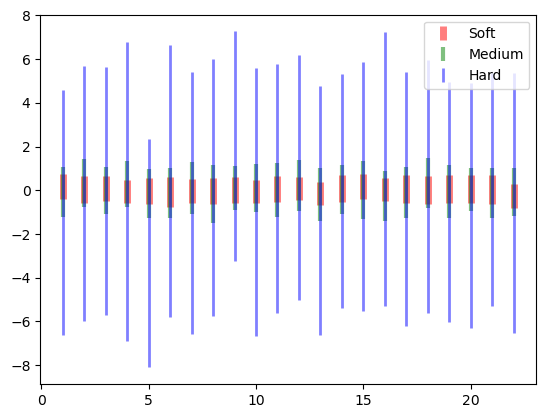

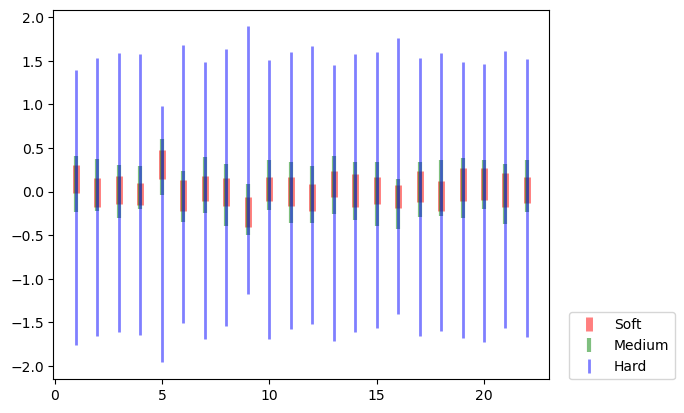

In [7]:
# Plot Error bar

plt.figure()
plt.errorbar(range(1, 23), np.mean(df_data[df_classes==1]), np.std(df_data[df_classes==1]), color = 'red', alpha=0.5, ls='', lw=5, label='Soft')
plt.errorbar(range(1, 23), np.mean(df_data[df_classes==2]), np.std(df_data[df_classes==2]), color = 'green', alpha=0.5, ls='', lw=3, label='Medium')
plt.errorbar(range(1, 23), np.mean(df_data[df_classes==3]), np.std(df_data[df_classes==3]), color = 'blue', alpha=0.5, ls='', lw=2, label='Hard')
plt.legend()

scaler = StandardScaler()
scaler.fit(df_data)
norm_data = scaler.transform(df_data)

plt.figure()
plt.errorbar(range(1, 23), np.mean(norm_data[df_classes==1], axis=0), np.std(norm_data[df_classes==1], axis=0), color = 'red', alpha=0.5, ls='', lw=5, label='Soft')
plt.errorbar(range(1, 23), np.mean(norm_data[df_classes==2], axis=0), np.std(norm_data[df_classes==2], axis=0), color = 'green', alpha=0.5, ls='', lw=3, label='Medium')
plt.errorbar(range(1, 23), np.mean(norm_data[df_classes==3], axis=0), np.std(norm_data[df_classes==3], axis=0), color = 'blue', alpha=0.5, ls='', lw=2, label='Hard')
plt.legend(loc=(1.04,0))


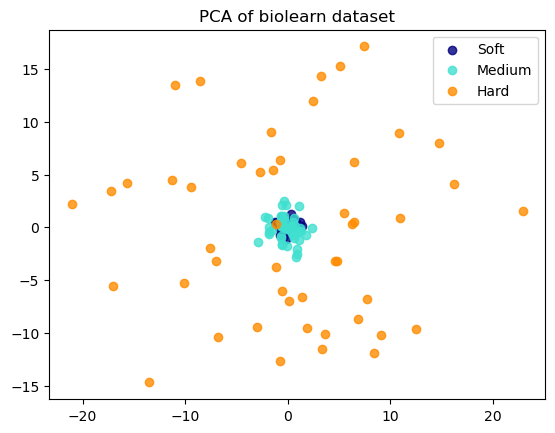

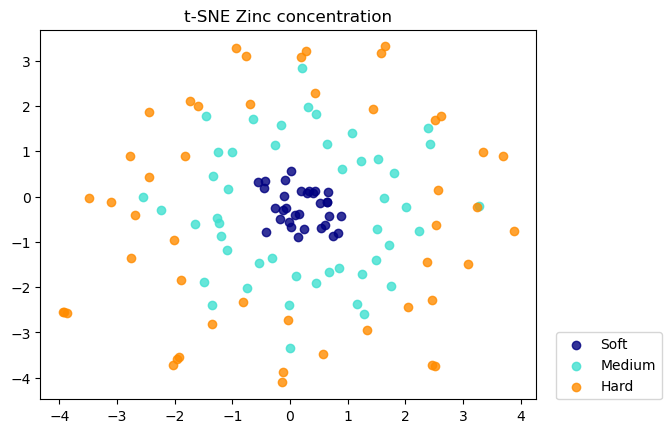

In [9]:
# Plot PCA and t-SNE dimensionality reduction

from sklearn import manifold, datasets
from sklearn.decomposition import PCA

#X, color = datasets.make_s_curve(n_points, random_state=0)
X = df_data
y = df_classes
n_components = 2

# For 3 classes
target_names = ["Soft", "Medium", "Hard"]
listvec = [1, 2, 3]
colors = ['navy', 'turquoise', 'darkorange']

# For 5 classes
#target_names = ["3", "5", "10", "25", "50-100"]
#listvec = [1, 2, 3, 4, 5]
#colors = ['navy', 'turquoise', 'darkorange', 'red', 'green']

# For 16 classes
#target_names = ["Soft 3", "Soft 5", "Soft 10", "Soft 25", "Medium 3", "Medium 5", "Medium 10", "Medium 25", "Medium 50", "Medium 100", "Hard 3", "Hard 5", "Hard 10", "Hard 25", "Hard 50", "Hard 100"]
#listvec = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
#import seaborn as sns
#colors = sns.color_palette("hls", 16)

# Create models and fit
tsne_model = manifold.TSNE(n_components=n_components, init='pca', random_state=0)
pca_model = PCA(n_components=2)
Ypca = pca_model.fit_transform(X)
Ytsne = tsne_model.fit_transform(X)

# Plot results
plt.figure()
lw = 1

for color, i, target_name in zip(colors, listvec, target_names):
    plt.scatter(Ypca[y == i, 0], Ypca[y == i, 1], color=color, alpha=.8, lw=lw, label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of biolearn dataset')
plt.show()

plt.figure()
for color, i, target_name in zip(colors, listvec, target_names):
    plt.scatter(Ytsne[y == i, 0], Ytsne[y == i, 1], alpha=.8, color=color, label=target_name)
plt.legend(loc=(1.04,0), shadow=False, scatterpoints=1) # for 16 classes
#plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('t-SNE Zinc concentration')
plt.show()



In [10]:
# Feature ranking with chi2

from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler

chi2scaler = MinMaxScaler().fit(df_data) # scale to range [0, 1]
X = chi2scaler.transform(df_data)
X = np.nan_to_num(X)

chi, pval = chi2(X, df_classes)

print(df_data.columns[np.flip(np.argsort(chi))])


Index(['Gene 5', 'Gene 9', 'Gene 1', 'Gene 16', 'Gene 13', 'Gene 20', 'Gene 7',
       'Gene 10', 'Gene 19', 'Gene 6', 'Gene 22', 'Gene 2', 'Gene 12',
       'Gene 17', 'Gene 4', 'Gene 8', 'Gene 18', 'Gene 15', 'Gene 21',
       'Gene 3', 'Gene 14', 'Gene 11'],
      dtype='object')


In [11]:
# Feature ranking from most important features for Random Forest
important_features_dict = {}

RF_model = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0)
RF_model.fit(df_data, df_classes)

for x,i in enumerate(RF_model.feature_importances_):
    important_features_dict[x]=i

important_features_list = sorted(important_features_dict,
                                 key=important_features_dict.get,
                                 reverse=True)

print(df_data.columns[important_features_list])

Index(['Gene 5', 'Gene 8', 'Gene 9', 'Gene 11', 'Gene 7', 'Gene 1', 'Gene 17',
       'Gene 15', 'Gene 4', 'Gene 10', 'Gene 22', 'Gene 16', 'Gene 13',
       'Gene 2', 'Gene 12', 'Gene 20', 'Gene 3', 'Gene 21', 'Gene 18',
       'Gene 19', 'Gene 6', 'Gene 14'],
      dtype='object')


In [13]:
# Install shapley values

!conda install -c conda-forge shap
#!conda install -c anaconda py-xgboost

^C


In [26]:
# Calculate the SV for a model and data set
import shap

# Choose model
#model = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0)
model = KNeighborsClassifier()  # faster for testing

model.fit(df_data, df_classes)
explainer = shap.KernelExplainer(model.predict_proba, df_data)
shap_values = explainer.shap_values(df_data)



X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
Using 128 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/128 [00:00<?, ?it/s]

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
X does not have valid feature names, but KNeighborsClassifier was fitted with fe

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
X does not have valid feature names, but KNeighborsClassifier was fitted with fe

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
X does not have valid feature names, but KNeighborsClassifier was fitted with fe

In [14]:
# Save shap values
np.save('berkay_shape_values_3class', shap_values)

In [25]:
# Load shap values
shap_values = np.load('berkay_shape_values_3class.npy')

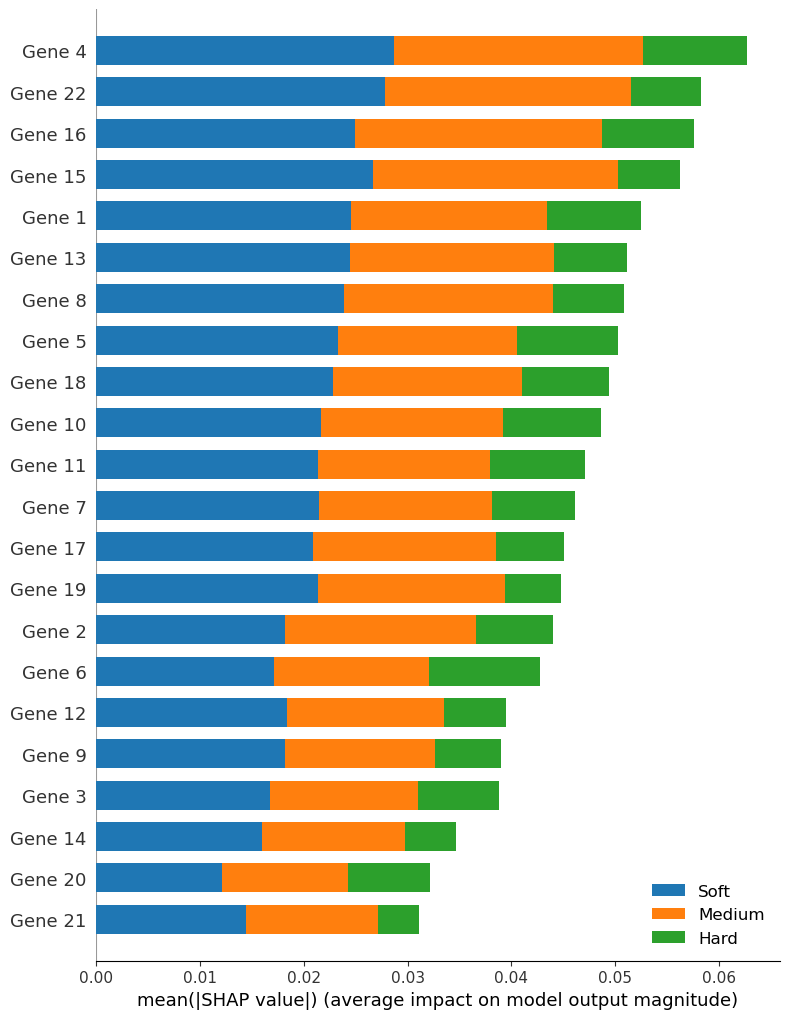

Actual:      0      1
1      1
2      1
3      1
4      1
      ..
123    3
124    3
125    3
126    3
127    3
Name: Class, Length: 128, dtype: int64 
Prediction:  [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


In [27]:
import matplotlib.pyplot as plt

target_names = ["Soft", "Medium", "Hard"]

shap.summary_plot(shap_values, df_data, plot_type="bar", max_display=df_data.shape[1], color=plt.get_cmap("tab10"), class_names=target_names)
RF_prediction = RF_model.predict(df_data)
print("Actual:     ", df_classes, "\nPrediction: ", RF_prediction)



Actual:      1 
Prediction:  1


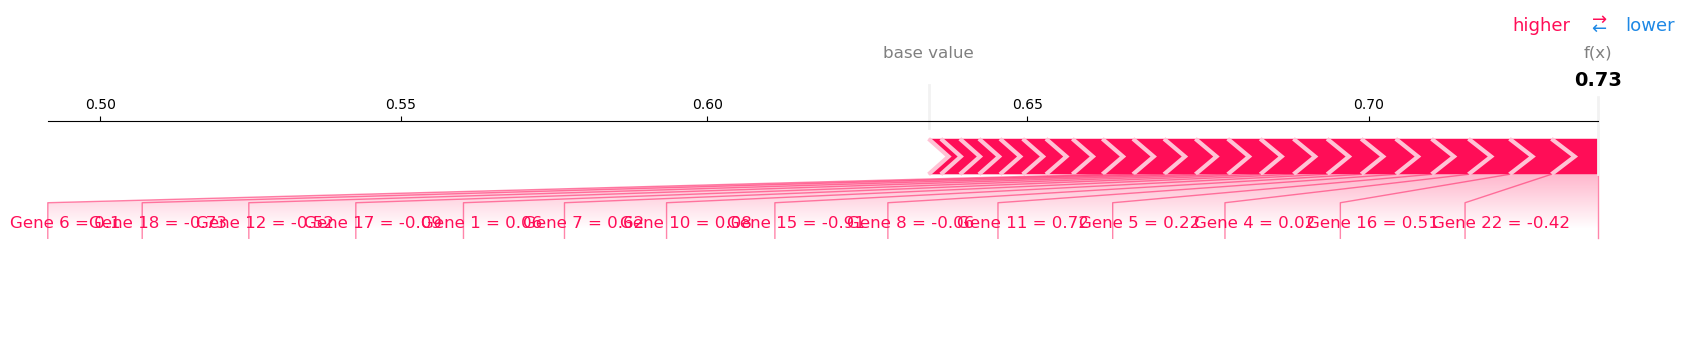

invalid value encountered in double_scalars
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


Actual:      1 
Prediction:  1


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


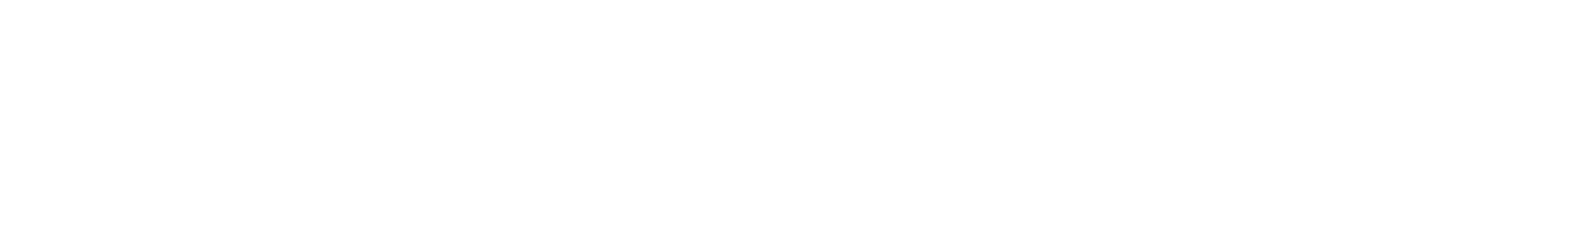

invalid value encountered in double_scalars
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


Actual:      1 
Prediction:  1


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


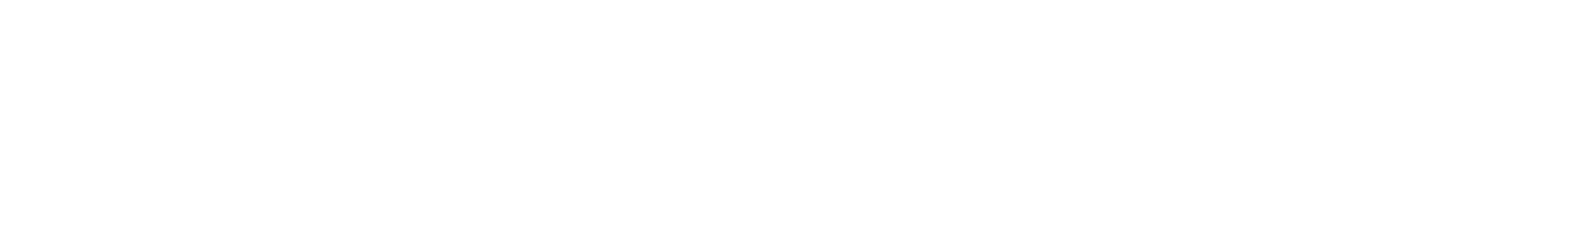

In [32]:
%matplotlib inline
for i in range(3):
    sample = 0
    currentclass = i
    prediction = model.predict(df_data)
    print("Actual:     ", df_classes[sample] , "\nPrediction: ", prediction[sample])
    shap.force_plot(explainer.expected_value[currentclass], shap_values[currentclass][sample,:], df_data.iloc[sample,:], link="logit", matplotlib=True)
    plt.show()

In [29]:
shap.plots.bar(shap_values2[:,:,2], max_display=df_data.shape[1])

NameError: name 'shap_values2' is not defined

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


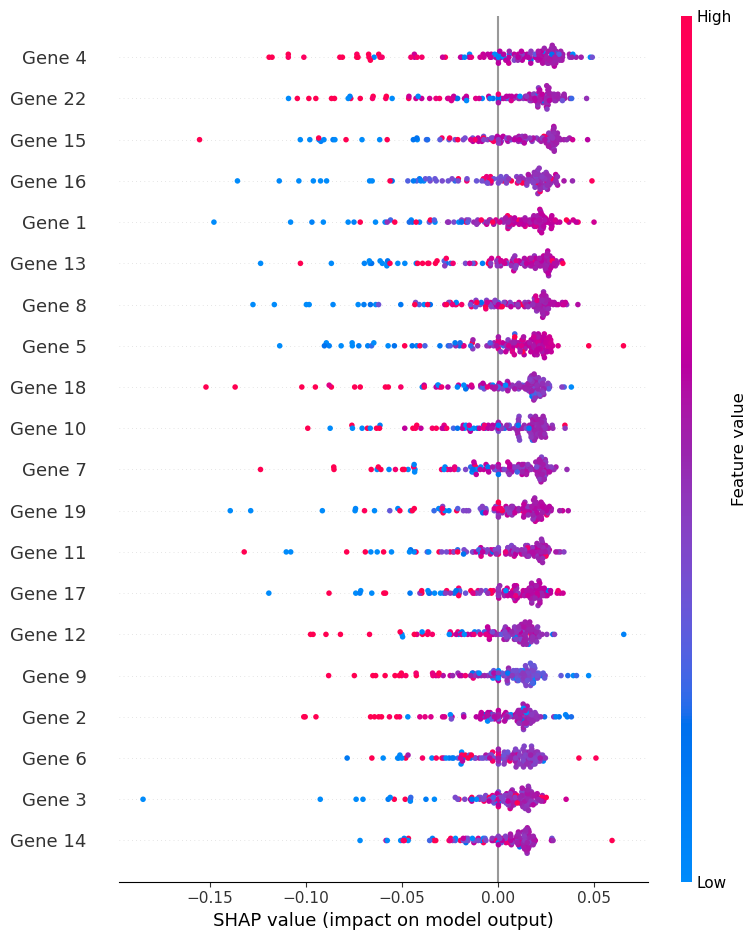

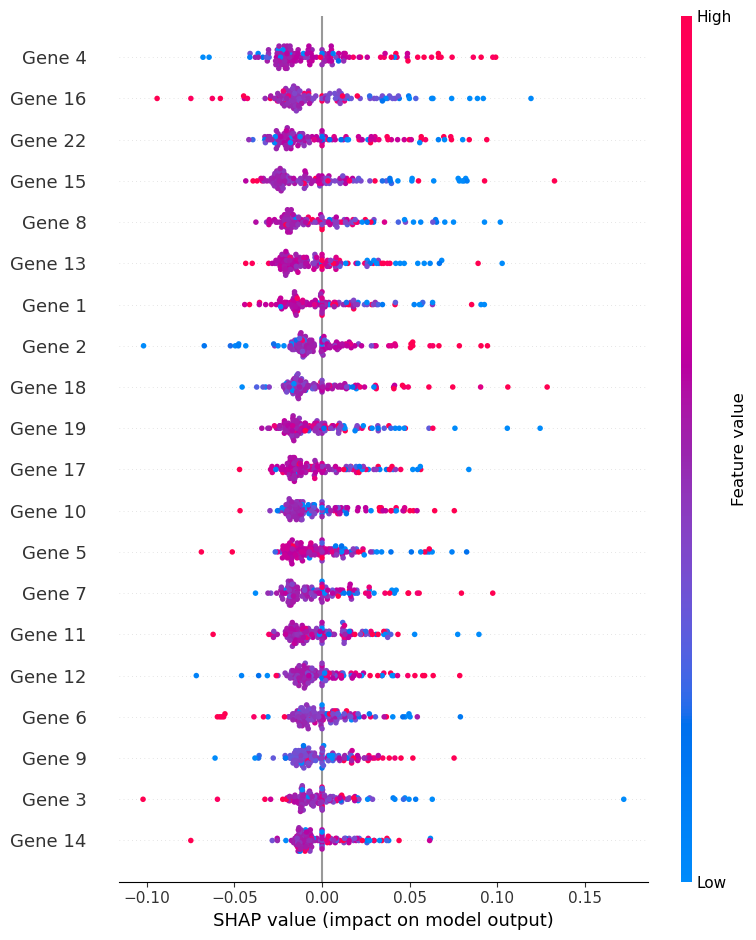

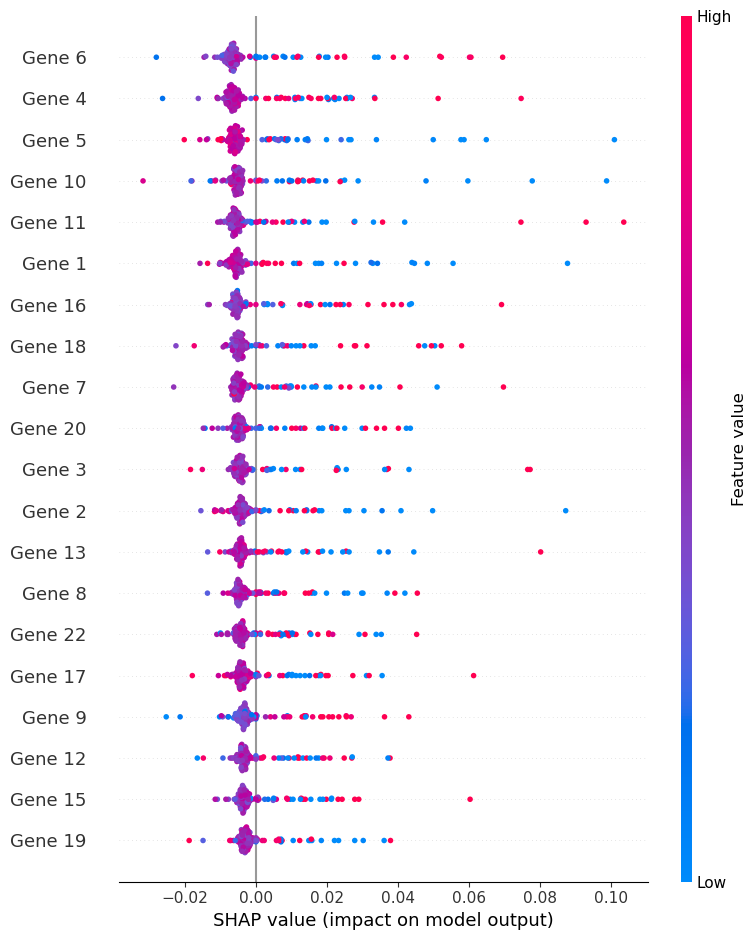

In [33]:
shap.summary_plot(shap_values[0], df_data)
shap.summary_plot(shap_values[1], df_data)
shap.summary_plot(shap_values[2], df_data)
